In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Test wheather GPU is working
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# which GPU we are using
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5672322015362620723, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11819644773079934977
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [ ]:
# RAM Information
!cat /proc/meminfo

MemTotal:       13333564 kB
MemFree:         9512052 kB
MemAvailable:   12016248 kB
Buffers:           84008 kB
Cached:          2413244 kB
SwapCached:            0 kB
Active:          1317228 kB
Inactive:        2077580 kB
Active(anon):     706212 kB
Inactive(anon):    10600 kB
Active(file):     611016 kB
Inactive(file):  2066980 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               952 kB
Writeback:             0 kB
AnonPages:        897572 kB
Mapped:           577944 kB
Shmem:             11268 kB
Slab:             186064 kB
SReclaimable:     133948 kB
SUnreclaim:        52116 kB
KernelStack:        5200 kB
PageTables:         9008 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666780 kB
Committed_AS:    4016652 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             1040 kB
AnonHugePages:   

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

# Artificial Neural Network

## Part 1 - Data Preprocessing

In [11]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Importing the DataSet
dataset = pd.read_csv('/content/drive/MyDrive/Krish Naik/ANN(Artificial Neural Network)/ann.ipynb')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
print(X)

      CreditScore Geography  Gender  ...  HasCrCard  IsActiveMember  EstimatedSalary
0             619    France  Female  ...          1               1        101348.88
1             608     Spain  Female  ...          0               1        112542.58
2             502    France  Female  ...          1               0        113931.57
3             699    France  Female  ...          0               0         93826.63
4             850     Spain  Female  ...          1               1         79084.10
...           ...       ...     ...  ...        ...             ...              ...
9995          771    France    Male  ...          1               0         96270.64
9996          516    France    Male  ...          1               1        101699.77
9997          709    France  Female  ...          0               1         42085.58
9998          772   Germany    Male  ...          1               0         92888.52
9999          792    France  Female  ...          1              

In [ ]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [ ]:
# Create dummy variables
geography = pd.get_dummies(X["Geography"], drop_first = True)
gender = pd.get_dummies(X["Gender"], drop_first = True)

In [ ]:
# Concatenate both columns
X = pd.concat([X,geography,gender], axis = 1)

In [ ]:
print(X)

      CreditScore Geography  Gender  Age  ...  EstimatedSalary  Germany  Spain  Male
0             619    France  Female   42  ...        101348.88        0      0     0
1             608     Spain  Female   41  ...        112542.58        0      1     0
2             502    France  Female   42  ...        113931.57        0      0     0
3             699    France  Female   39  ...         93826.63        0      0     0
4             850     Spain  Female   43  ...         79084.10        0      1     0
...           ...       ...     ...  ...  ...              ...      ...    ...   ...
9995          771    France    Male   39  ...         96270.64        0      0     1
9996          516    France    Male   35  ...        101699.77        0      0     1
9997          709    France  Female   36  ...         42085.58        0      0     0
9998          772   Germany    Male   42  ...         92888.52        1      0     1
9999          792    France  Female   28  ...         38190.78   

In [ ]:
# drop columns
X = X.drop(['Geography', 'Gender'], axis = 1)

In [ ]:
print(X)

      CreditScore  Age  Tenure  ...  Germany  Spain  Male
0             619   42       2  ...        0      0     0
1             608   41       1  ...        0      1     0
2             502   42       8  ...        0      0     0
3             699   39       1  ...        0      0     0
4             850   43       2  ...        0      1     0
...           ...  ...     ...  ...      ...    ...   ...
9995          771   39       5  ...        0      0     1
9996          516   35      10  ...        0      0     1
9997          709   36       7  ...        0      0     0
9998          772   42       3  ...        1      0     1
9999          792   28       4  ...        0      0     0

[10000 rows x 11 columns]


In [ ]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Part 2 - Now lets make the ann

## Importing the keras libraries and packages

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [ ]:
# Initializing the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform', activation='relu', input_dim = 11))
classifier.add(Dropout(0.3))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dropout(0.4))

In [ ]:
# Adding the third hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dropout(0.2))

In [ ]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 5s 4ms/step - loss: 1.1732 - accuracy: 0.5415 - val_loss: 0.4965 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5531 - accuracy: 0.7781 - val_loss: 0.4789 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4967 - accuracy: 0.8026 - val_loss: 0.4670 - val_accuracy: 0.7959
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5091 - accuracy: 0.7853 - val_loss: 0.4547 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4760 - accuracy: 0.7994 - val_loss: 0.4494 - val_accuracy: 0.7959
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4632 - accuracy: 0.8030 - val_loss: 0.4436 - val_accuracy: 0.7959
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4694 - accuracy: 0.7893 - val_loss: 0.4391 - val_accuracy: 0.7959

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


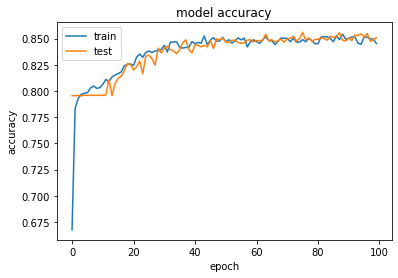

In [ ]:
# List all data in history
print(model_history.history.keys())

#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

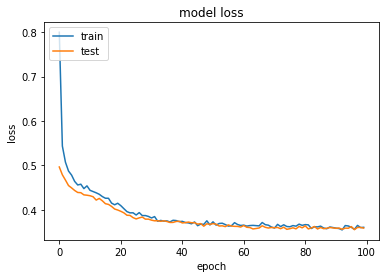

In [ ]:
#summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

## Part 3 - Making the prediction and evaluating the model

## Predicting the test set result

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1560,   35],
       [ 240,  165]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [ ]:
score

0.8625